Shor Simulation
===


In [1]:
import shor

import math
import random
from fractions import Fraction

import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = int(input("N: "))
x = int(input("x: "))
n = math.ceil(math.log2(N))
t = math.floor(2 * math.log2(N)) + 1

n_states = 2 ** t
measured = 1
QReg = {"n_states": n_states,
        "prob": np.empty(n_states, dtype=np.double)}

N: 21
x: 2


In [3]:
def phi_0(reg):
    n_states = reg["n_states"]
    prob = reg["prob"]
    
    prob[0] = 1
    for j in range(1, n_states):
        prob[j] = 0

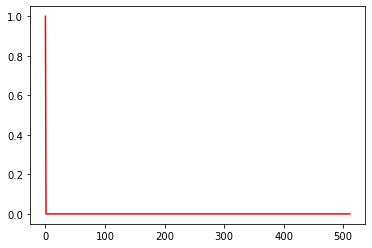

In [4]:
phi_0(QReg)
plt.plot(QReg["prob"], 'r')
plt.show()

In [5]:
def phi_1(reg):
    n_states = reg["n_states"]
    prob = reg["prob"]
    
    for j in range(n_states):
        prob[j] = 1 / n_states

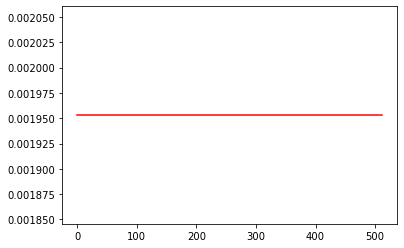

In [6]:
phi_1(QReg)
plt.plot(QReg["prob"], 'r')
plt.show()

In [7]:
def phi_2(reg):
    n_states = reg["n_states"]
    prob = reg["prob"]
    freq_powers = np.zeros(N, dtype=np.double)
    for j in range(n_states):
        power = shor.power_mod(x, j, N)
        freq_powers[power] += prob[j]
    return freq_powers

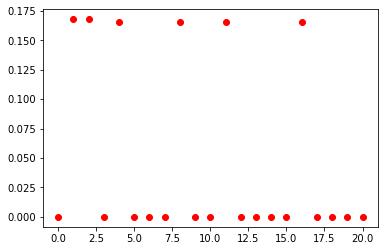

In [8]:
freq_powers = phi_2(QReg)
plt.plot(freq_powers, 'ro')
plt.show()

In [9]:
def phi_3(reg):
    n_states = reg["n_states"]
    prob = reg["prob"]
    
    x_b = shor.power_mod(x, measured, N)
    
    cnt = 0
    for j in range(n_states):
        if x_b == shor.power_mod(x, j, N):
            cnt += 1
    
    for j in range(n_states):
        if x_b == shor.power_mod(x, j, N):
            prob[j] = 1 / cnt
        else:
            prob[j] = 0

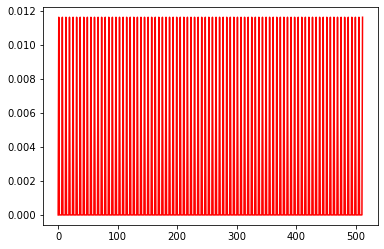

In [10]:
phi_3(QReg)
plt.plot(QReg["prob"], 'r')
plt.show()

In [11]:
def phi_4(reg):
    n_states = reg["n_states"]
    reg["prob"] = shor.DFT(reg["prob"], n_states)

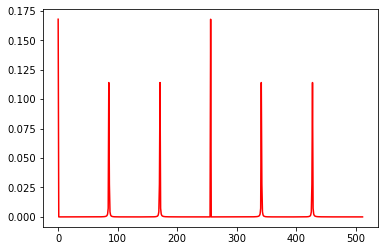

In [12]:
phi_4(QReg)
plt.plot(QReg["prob"], 'r')
plt.show()

In [13]:
m = 0
while m == 0:
    m = np.random.choice(range(2**t), p=QReg["prob"])
print("Measured:", m)

Measured: 256


In [14]:
coef = []
f = Fraction(m, n_states)

while f != 0:
    f = 1 / f
    i = int(f)
    f = f - i
    coef.append(i)

In [15]:
convergents = [Fraction(1,1)]
for last in range(len(coef)):
    c = Fraction(1,coef[last])
    for idx in reversed(range(last)):
        c += Fraction(coef[idx], 1)
        c = 1 / c
    convergents.append(c)

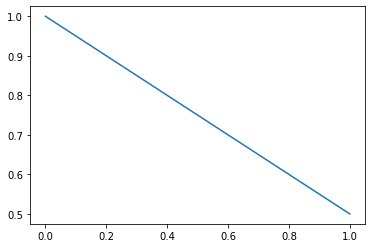

In [16]:
plt.plot(convergents)
plt.show()

In [17]:
r = 1
for c in convergents:
    if c.denominator < N:
        r = c.denominator

In [18]:
print("Candidate:", r)
print("Found:", x ** r % N == 1)

Candidate: 2
Found: False
